Core Concepts We'll Cover:
1. Regression vs. Classification: Understanding the goal of predicting a continuous value.
2. Target Variable Analysis: Analyzing the distribution of SalePrice and applying transformations (log transform).
3. Advanced Data Preprocessing: Implementing robust strategies for handling missing values in both numerical and categorical
features.
4. Feature Engineering: Creating new, powerful features from the existing data to improve model performance.
5. Categorical Encoding: Differentiating between and applying Label Encoding and One-Hot Encoding.
6. Model Building: Training and comparing a simple baseline model (Linear Regression) with an advanced model (XGBoost).
7. Model Evaluation: Understanding and using key regression metrics (RMSE, MAE, R-squared).

## STEP 1 :
SETTING UP KAAGLE API & IMPORTING LIBRARY

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import os


In [22]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')



In [23]:
train_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [24]:
train_data.set_index('Id', inplace=True)
test_data.set_index('Id', inplace=True)

In [25]:
print("Training data shape: ",train_data.shape)
print("Testing Data Shape: ",test_data.shape)

Training data shape:  (1460, 80)
Testing Data Shape:  (1459, 79)


## STEP 3

EDA

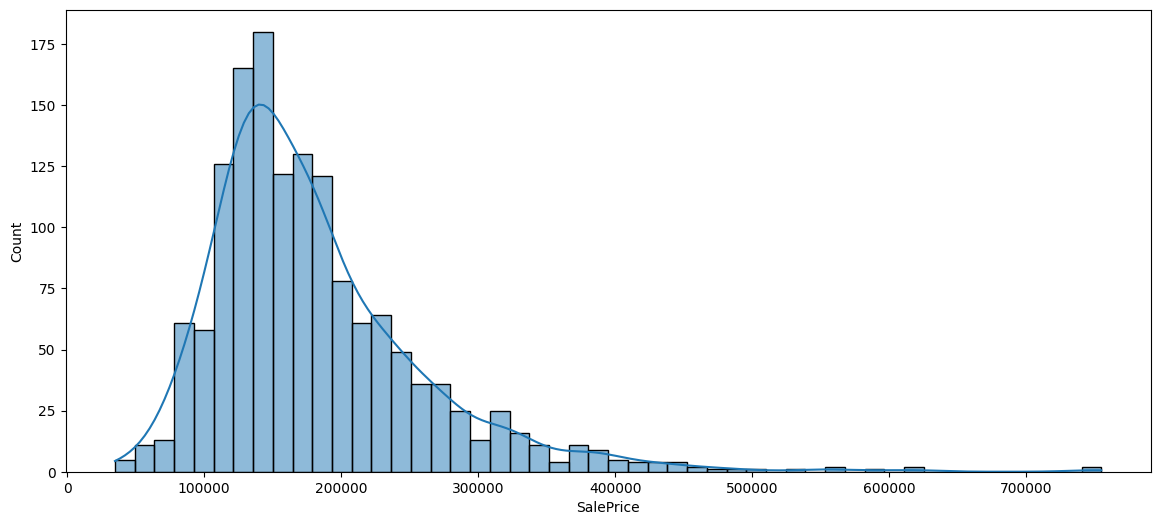

Skewnes of Saleprice: 1.880940746034036


In [26]:
plt.figure(figsize=(14, 6))
sns.histplot(train_data['SalePrice'], kde=True, bins=50)
plt.show()

print(f"Skewnes of Saleprice: {skew(train_data['SalePrice'])}")

SKEWNESS AND LOG TRANSFORMATION

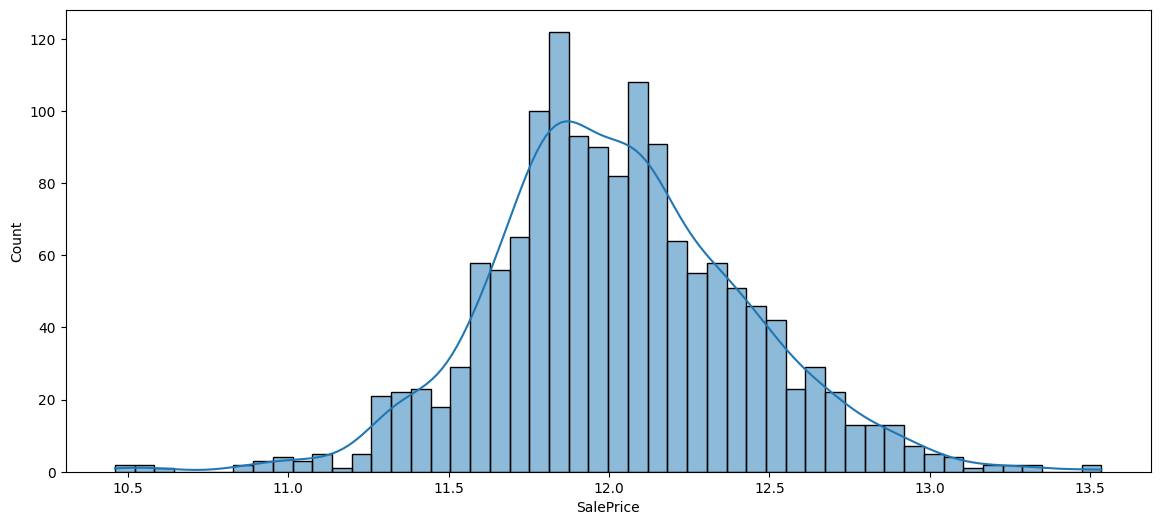

Skewness of SalePrice: 0.12122191311528363


In [27]:
train_data['SalePrice'] = np.log1p(train_data['SalePrice'])

plt.figure(figsize=(14, 6))
sns.histplot(train_data['SalePrice'], kde=True, bins=50)
plt.show()

print(f"Skewness of SalePrice: {skew(train_data['SalePrice'])}")

**Observation**:

## STEP 4

EDA ON FEATURE VARIABLES

In [28]:
#find the top 10 features most correlated with saleprice
corrmat = train_data.corr(numeric_only=True)
top_corr_features = corrmat.nlargest(10, 'SalePrice')['SalePrice'].index
top_corr_matrix = train_data[top_corr_features].corr()

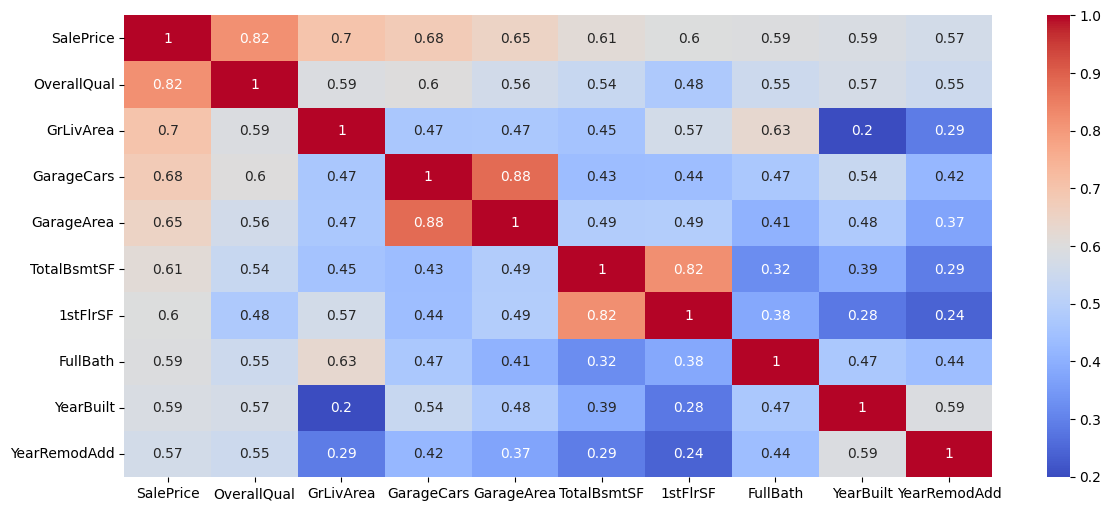

In [31]:
plt.figure(figsize=(14, 6))
sns.heatmap(top_corr_matrix, annot=True, cmap="coolwarm")
plt.show()

Insight: The heatmap shows that overallQua1 (Overall Quality), GrLivArea (Above Ground Living Area), and
GarageCars / GarageArea are the most positively correlated features with saleprice This makes intuitive sense—better quality, larger
houses with bigger garages tend to be more expensive.

## STEP 5

#### DATA PREPROCESSING AND FEATURE ENGINEERING

In [34]:
## Combine test and train data for consistent preprocessing
all_data = pd.concat((train_data.loc[:, :'SaleCondition'], test_data.loc[:, 'SaleCondition']))

In [35]:
all_data.shape

(2919, 79)

### 5.1 Handling Missing Values

In [39]:
missing_data = all_data.isnull().sum().sort_values(ascending=False)
missing_data = missing_data[missing_data > 0]

print(missing_data)
print(missing_data.shape)

PoolQC         2912
MiscFeature    2865
Alley          2828
Fence          2638
MasVnrType     2331
               ... 
3SsnPorch      1459
MiscVal        1459
MoSold         1459
YrSold         1459
SaleType       1459
Length: 78, dtype: int64
(78,)
